**Project Overview:**

In this project, we explore the task of handwritten digit recognition using various machine learning models. We compare simple and multi-layer neural networks (MLPs), Random Forests, and a single Decision Tree to evaluate their ability to learn patterns from image data and generalize to unseen examples. 

The models are assessed through cross-validation and validation accuracy, and their predictions are visualized to understand which digits each model handles confidently. This analysis highlights how model complexity and learning capacity impact performance, with shallow neural networks and ensemble methods achieving the best results for this classification task.

In [ ]:
#import libraries

import numpy as np
import pandas as pd

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

In [8]:
# Load MNIST digits dataset
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

print("Dataset shape:", X.shape)

Dataset shape: (1797, 64)


In [10]:
#train and split
X_train_full, X_val, y_train_full, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Ensemble (Gradient Boosting)": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP (1 Hidden Layer)": make_pipeline(
        StandardScaler(),
        MLPClassifier(hidden_layer_sizes=(64,), max_iter=500, random_state=42)
    ),
    "MLP (2 Hidden Layers)": make_pipeline(
        StandardScaler(),
        MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
    ),
    "MLP (3 Hidden Layers)": make_pipeline(
        StandardScaler(),
        MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=500, random_state=42)
    ),
}

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_full, y_train_full, cv=5)
    model.fit(X_train_full, y_train_full)
    y_pred_val = model.predict(X_val)

    results[name] = {
        "cv_mean": np.mean(cv_scores),
        "val_accuracy": accuracy_score(y_val, y_pred_val),
        "model": model
    }

results


{'Decision Tree': {'cv_mean': 0.8490864961969192,
  'val_accuracy': 0.8333333333333334,
  'model': DecisionTreeClassifier(random_state=42)},
 'Ensemble (Gradient Boosting)': {'cv_mean': 0.9622673240836296,
  'val_accuracy': 0.9611111111111111,
  'model': GradientBoostingClassifier(random_state=42)},
 'Random Forest': {'cv_mean': 0.9764896991935176,
  'val_accuracy': 0.9722222222222222,
  'model': RandomForestClassifier(random_state=42)},
 'MLP (1 Hidden Layer)': {'cv_mean': 0.9771184497190688,
  'val_accuracy': 0.9833333333333333,
  'model': Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('mlpclassifier',
                   MLPClassifier(hidden_layer_sizes=(64,), max_iter=500,
                                 random_state=42))])},
 'MLP (2 Hidden Layers)': {'cv_mean': 0.9696919313534382,
  'val_accuracy': 0.9833333333333333,
  'model': Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('mlpclassifier',
                   MLPClassifier(hidd

In [30]:
# Convert results dictionary into a pandas DataFrame
results_table = pd.DataFrame.from_dict(results, orient='index')
results_table = results_table.drop(columns=['model'])  

# Format numbers nicely
results_table['cv_mean'] = results_table['cv_mean'].round(3)
results_table['val_accuracy'] = results_table['val_accuracy'].round(3)

results_table

,cv_mean,val_accuracy
Decision Tree,0.849,0.833
Ensemble (Gradient Boosting),0.962,0.961
Random Forest,0.976,0.972
MLP (1 Hidden Layer),0.977,0.983
MLP (2 Hidden Layers),0.970,0.983
MLP (3 Hidden Layers),0.974,0.972


**Performance Summary:**

Across all models, the highest cross-validation (CV) performance was observed in the MLP models. The 1-hidden-layer MLP achieved the best CV mean score of approximately 0.977, closely followed by the 3-layer MLP and Random Forest models. These results indicate that the neural networks were able to consistently learn meaningful patterns during training and converged reliably.

The validation results show a similar trend, where the MLP with 1 and 2 hidden layers attained the strongest performance (about 0.983 validation accuracy). The Random Forest also performed well (0.972), reinforcing the benefit of combining multiple decision trees to improve generalization. In contrast, the single Decision Tree had the weakest performance in both CV and validation accuracy, likely due to higher variance and overfitting.

Overall, performance improved as model complexity increased, but deeper networks did not offer substantial gains beyond two hidden layers, suggesting a point of diminishing returns.

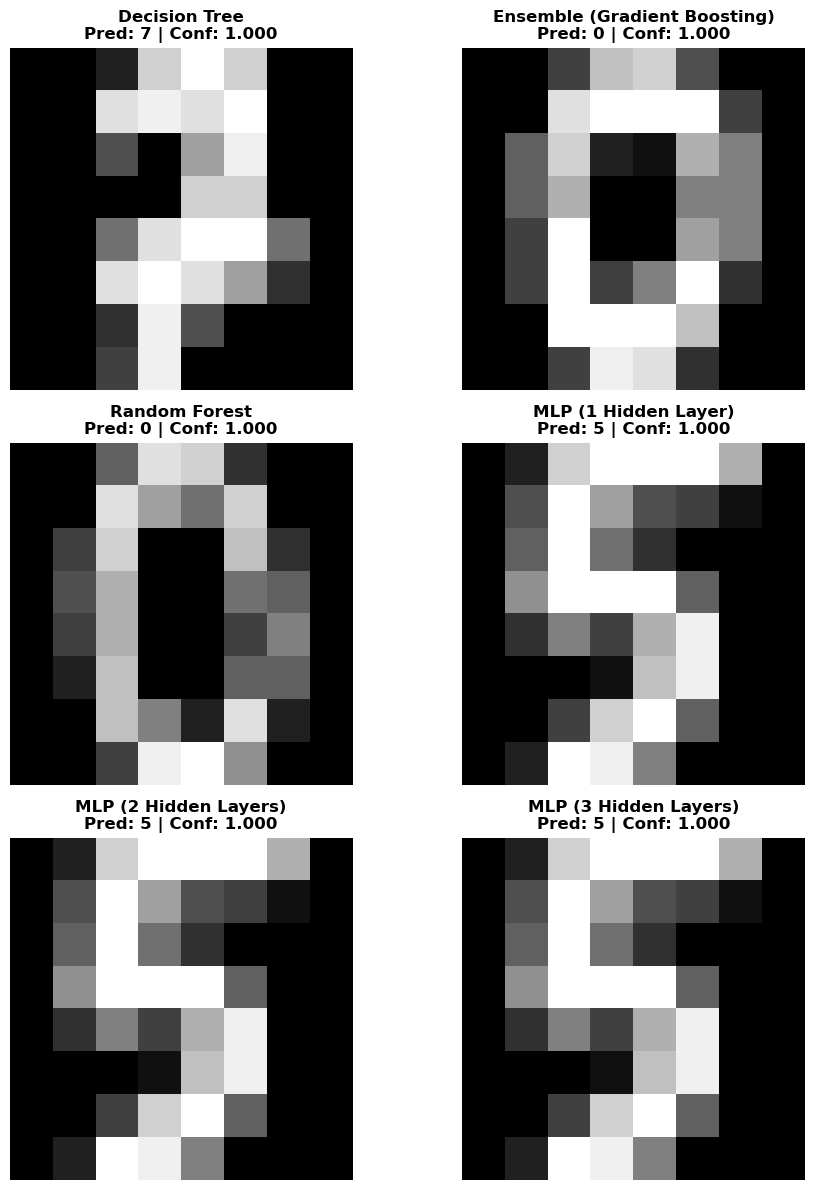

In [40]:
import math

num_models = len(results)
rows = 3
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
axes = axes.flatten()

for ax, (name, stats) in zip(axes, results.items()):
    model = stats["model"]
    proba = model.predict_proba(X_val)

    conf_idx = np.argmax(np.max(proba, axis=1))
    img = X_val[conf_idx].reshape(8, 8)
    pred_label = model.predict([X_val[conf_idx]])[0]
    conf_score = np.max(proba[conf_idx])

    ax.imshow(img, cmap='gray')
    ax.set_title(
        f"{name}\nPred: {pred_label} | Conf: {conf_score:.3f}",
        fontsize=12,
        fontweight='bold'
    )
    ax.axis('off')

# Remove any unused axes (if number of models < rows*cols)
for i in range(num_models, rows*cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


**Figure Observation:**

This figure shows the digits that each model was most confident about when making predictions on the validation set. All models had at least one digit they predicted with full confidence, which means they can perform very well when the digit is clear. 

The more advanced models, especially the MLPs and Random Forest, chose digits that look clean and easy to recognize, while the Decision Tree’s example looks more distorted, which matches its lower accuracy. Overall, the visual results support the performance differences seen earlier.

**Conclusion:**

Overall, the neural network models performed the best on this classification task, with the 1- and 2-hidden-layer MLPs achieving the highest validation accuracy and confident predictions. 

Random Forest also showed strong results, while the single Decision Tree struggled to generalize. These results suggest that models capable of learning more complex patterns are better suited for handwritten digit recognition.